## Project- Image classification project using Convoluation Neural Network(KNN)

#### In this project we are going to build a Deep learning model which predicting whether a patient has Pneumonia or not
---

input dataset is in form of images

importing libraries

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import pathlib
import PIL

In [3]:
data_dir='xray_dataset_covid19/train/'

In [4]:
data_dir=pathlib.Path(data_dir)

In [5]:
data_dir

WindowsPath('xray_dataset_covid19/train')

In [6]:
img= list(data_dir.glob('*/*.jpeg'))
img=img[0]

In [7]:
img=str(img)

In [8]:
img=cv2.imread(img)

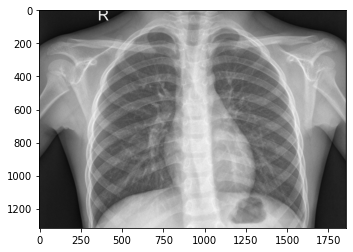

In [9]:
plt.imshow(img)

In [10]:
labels_dict={
    'normal':0,
    'pneumonia':1,
}

In [11]:
#images_dict

In [12]:
images_dict ={
    'normal': list(data_dir.glob('normal/*')),
    'pneumonia': list(data_dir.glob('pneumonia/*')),
}

In [13]:
X =[]
y = []

for target , images in images_dict.items():
    for image in images:
        img= cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)

        y.append(labels_dict[target])

In [14]:
img=X[0]

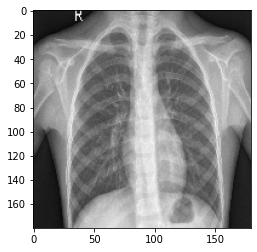

In [15]:
plt.imshow(img)

In [16]:
y_df=pd.DataFrame(y)

In [17]:
y_df.value_counts()

0    94
1    94
dtype: int64

In [25]:
X = np.array(X)
y = np.array(y)

In [26]:
X.shape

(188, 180, 180, 3)

In [27]:
y.shape

(188,)

#### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Build Convoluational neural network and train it

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [31]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [46]:
num_classes = 1

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
#   layers.Dense(128, activation='sigmoid'),layers.Dropout(0.5),
#   layers.Dense(64, activation='sigmoid'),layers.Dropout(0.2),
  layers.Dense(32, activation='relu'),layers.Dropout(0.2),
  layers.Dense(16, activation='relu'),
  
    
  layers.Dense(num_classes,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=20)              

Epoch 1/20
5/5 [==============================] - 5s 744ms/step - loss: 0.6674 - accuracy: 0.5753
Epoch 2/20
5/5 [==============================] - 4s 734ms/step - loss: 0.5226 - accuracy: 0.7810
Epoch 3/20
5/5 [==============================] - 4s 766ms/step - loss: 0.3467 - accuracy: 0.9067
Epoch 4/20
5/5 [==============================] - 4s 795ms/step - loss: 0.3462 - accuracy: 0.8401
Epoch 5/20
5/5 [==============================] - 4s 878ms/step - loss: 0.2480 - accuracy: 0.9267
Epoch 6/20
5/5 [==============================] - 4s 782ms/step - loss: 0.1769 - accuracy: 0.9471
Epoch 7/20
5/5 [==============================] - 4s 810ms/step - loss: 0.1318 - accuracy: 0.9563
Epoch 8/20
5/5 [==============================] - 4s 785ms/step - loss: 0.2630 - accuracy: 0.9135
Epoch 9/20
5/5 [==============================] - 4s 747ms/step - loss: 0.1571 - accuracy: 0.9372
Epoch 10/20
5/5 [==============================] - 4s 751ms/step - loss: 0.0854 - accuracy: 0.9632
Epoch 11/20
5/5 [==

In [47]:
print(model.evaluate(X_test,y_test))

2/2 [==============================] - 1s 62ms/step - loss: 89.5343 - accuracy: 0.9211
[89.53430938720703, 0.9210526347160339]


In [48]:
img = X_test[0]

In [49]:
img.shape

(180, 180, 3)

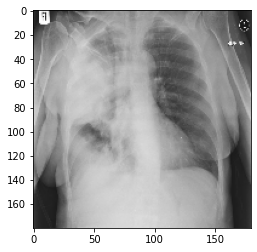

In [50]:
plt.imshow(img)

In [51]:
yp = model.predict(X_test)
yp[:5]

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [52]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [53]:
y_pred[:10]

[1, 1, 0, 1, 0, 1, 0, 0, 0, 1]

In [55]:
y_test[:10]

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [56]:
import pandas as pd

In [58]:
yp.shape

(38, 1)

In [63]:
df1['predictions']= pd.DataFrame(y_pred)

In [64]:
df1['truth']= pd.DataFrame(y_test)

In [69]:
df1.drop(0,axis=1,inplace=True)
df1.head(10)

,truth,predictions
0,1,1
1,1,1
2,0,0
3,0,1
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1


<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

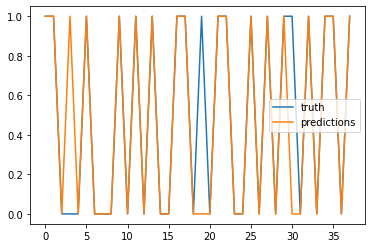

In [80]:
plt.figure(figsize=(12,8))
df1.plot()
